
                                          Fulin Guo

# Question 1

### Problem 1

In [1]:
import sympy as sy
import numpy as np
import math
import random
import time
from matplotlib import pyplot as plt
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy.abc import x
def f(x):
    # Define the function
    return (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
x=sy.symbols('x')
ff=sy.diff(f(x),x)
# Lambdify the resulting function
lam_ff=lambdify(x,ff,'numpy')

In [2]:
x=np.arange(-math.pi,math.pi,0.01)
y=np.array(list(map(lambda x:f(x),x))) # f(x)
z=np.array(list(map(lambda x:lam_ff(x),x))) # The derivative function

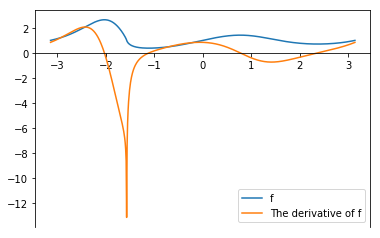

In [3]:
plt.plot(x,y,label='f')
plt.plot(x,z,label='The derivative of f')
ax=plt.gca()
ax.spines['bottom'].set_position('zero')
plt.legend()

The above figure is the function f (the blue curve) and its derivative function (the orange curve). We can see that when the function f is increasing, the derivative function is above zero, when the function f is decreasing, the derivative function is below zero, and when the function f attains its extremum, the derivative function is equal to zero.

### Problem 2

#### Forward (Order:1)

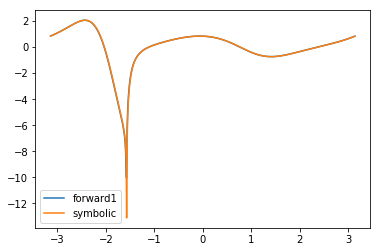

In [4]:
def forward1(f,x,h):
    # Forward (Order:1)
    return np.array(list(map(lambda x:(f(x+h)-f(x))/h,x)))
x=np.arange(-math.pi,math.pi,0.01)
f1=forward1(f,x,0.01)
plt.plot(x,f1,label='forward1')
plt.plot(x,z,label='symbolic')
plt.legend()

The above figure is the derivative function of f using Forward (Order:1) method. We can see the orange curve (the result of Problem 1) almost coincides with the blue curve, which indicates my forward1 function is valid.

#### Forward (Order:2)

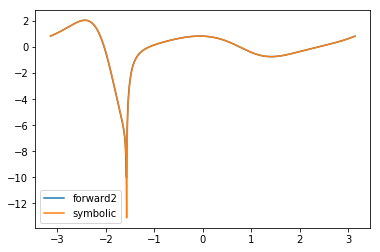

In [5]:
def forward2(f,x,h):
    # Forward (Order:2)
    return np.array(list(map(lambda x:(-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h),x)))
x=np.arange(-math.pi,math.pi,0.01)
f2=forward2(f,x,0.01)
plt.plot(x,f1,label='forward2')
plt.plot(x,z,label='symbolic')
plt.legend()

The above figure is the derivative function of f using Forward (Order:2) method. We can see the orange curve (the result of Problem 1) almost coincides with the blue curve, which indicates my forward2 function is valid.

#### Backward (Order:1)

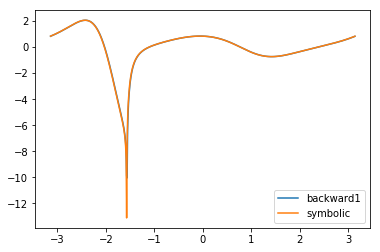

In [6]:
def backward1(f,x,h):
    # Backward (Order:1)
    return np.array(list(map(lambda x:(f(x)-f(x-h))/h,x)))
x=np.arange(-math.pi,math.pi,0.01)
f1=backward1(f,x,0.01)
plt.plot(x,f1,label='backward1')
plt.plot(x,z,label='symbolic')
plt.legend()

The above figure is the derivative function of f using Backward (Order:1) method. We can see the orange curve (the result of Problem 1) almost coincides with the blue curve, which indicates my backward1 function is valid.

#### Backward (Order:2)

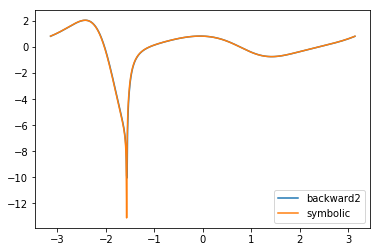

In [7]:
def backward2(f,x,h):
    # Backward (Order:2)
    return np.array(list(map(lambda x:(3*f(x)-4*f(x-h)+f(x-2*h))/(2*h),x)))
x=np.arange(-math.pi,math.pi,0.01)
f2=backward2(f,x,0.01)
plt.plot(x,f1,label='backward2')
plt.plot(x,z,label='symbolic')
plt.legend()

The above figure is the derivative function of f using Backward (Order:2) method. We can see the orange curve (the result of Problem 1) almost coincides with the blue curve, which indicates my backward2 function is valid.

#### Centered (Order:2)

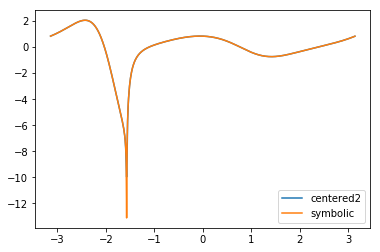

In [8]:
def centered2(f,x,h):
    # Centered (Order:2)
    return np.array(list(map(lambda x:(f(x+h)-f(x-h))/(2*h),x)))
x=np.arange(-math.pi,math.pi,0.01)
f1=centered2(f,x,0.01)
plt.plot(x,f1,label='centered2')
plt.plot(x,z,label='symbolic')
plt.legend()

The above figure is the derivative function of f using Centered (Order:2) method. We can see the orange curve (the result of Problem 1) almost coincides with the blue curve, which indicates my centered2 function is valid.

#### Centered (Order:4)

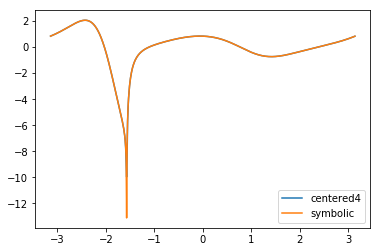

In [9]:
def centered4(f,x,h):
    # Centered (Order:4)
    return np.array(list(map(lambda x:(f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h),x)))
x=np.arange(-math.pi,math.pi,0.01)
f2=centered4(f,x,0.01)
plt.plot(x,f1,label='centered4')
plt.plot(x,z,label='symbolic')
plt.legend()

The above figure is the derivative function of f using Centered (Order:4) method. We can see the orange curve (the result of Problem 1) almost coincides with the blue curve, which indicates my centered4 function is valid.

### Problem 3

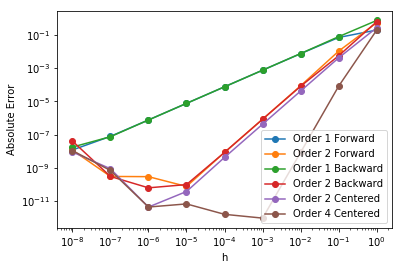

In [10]:
h=np.logspace(-8,0,9)
def problem3(x):
    # Calculate the derivative of f(x) at point x
    f1=np.array([])
    f2=np.array([])
    b1=np.array([])
    b2=np.array([])
    c2=np.array([])
    c4=np.array([])
    for i in range(len(h)):
        # Calculate the derivative using the function in problem 2
        f1=np.concatenate([f1,forward1(f,[x],h[i])])
        f2=np.concatenate([f2,forward2(f,[x],h[i])])
        b1=np.concatenate([b1,backward1(f,[x],h[i])])
        b2=np.concatenate([b2,backward2(f,[x],h[i])])
        c2=np.concatenate([c2,centered2(f,[x],h[i])])
        c4=np.concatenate([c4,centered4(f,[x],h[i])])
    return [f1,f2,b1,b2,c2,c4]
plt.loglog(h,abs(problem3(1)[0]-lam_ff(1)),marker='o',label='Order 1 Forward')
plt.loglog(h,abs(problem3(1)[1]-lam_ff(1)),marker='o',label='Order 2 Forward')
plt.loglog(h,abs(problem3(1)[2]-lam_ff(1)),marker='o',label='Order 1 Backward')
plt.loglog(h,abs(problem3(1)[3]-lam_ff(1)),marker='o',label='Order 2 Backward')
plt.loglog(h,abs(problem3(1)[4]-lam_ff(1)),marker='o',label='Order 2 Centered')
plt.loglog(h,abs(problem3(1)[5]-lam_ff(1)),marker='o',label='Order 4 Centered')
plt.ylabel('Absolute Error')
plt.xlabel('h')
plt.legend()

### Problem 4

In [12]:
a=np.load('plane.npy')
# Covert the degrees to radians
alpha=np.deg2rad(a[:,1])
beta=np.deg2rad(a[:,2])
# Calculate x(t) and y(t)
x=(500*np.tan(beta))/(np.tan(beta)-np.tan(alpha))
y=(500*np.tan(beta)*np.tan(alpha))/(np.tan(beta)-np.tan(alpha))

In [13]:
speed=[[7,math.sqrt((x[1]-x[0])**2+(y[1]-y[0])**2)]]
for i in range(1,7):
    speed.append([7+i,math.sqrt(((x[i+1]-x[i-1])/2)**2+((y[i+1]-y[i-1])/2)**2)])
speed.append([14,math.sqrt((x[6]-x[5])**2+(y[6]-y[5])**2)])

In [14]:
speed

[[7, 46.42420062213374],
 [8, 47.001039380953344],
 [9, 48.99880514036797],
 [10, 50.09944162965227],
 [11, 48.290350838204944],
 [12, 51.564559049272255],
 [13, 53.923033545053535],
 [14, 56.331436401731736]]

The above list is the speed of the airplane at each time. Each row represents a different record. The first column is the time t, and the second column is the speed at that time.

### Problem 5

In [15]:
def mulf(f,x,h):
    n=len(x)
    m=len(f)
    jacob=np.full((m,n),0,dtype='float')
    e=np.identity(n)
    for j in range(0,n):
        for i in range(0,m):
            jacob[i,j]=((f[i](x+h*e[j])-f[i](x-h*e[j])))/(2*h)
    return np.array(jacob)

In [16]:
# Test
def f1(x):
    return x[0]**2
def f2(x):
    return x[0]**3-x[1]
mulf([f1,f2],np.array([2,2]),0.01)

array([[ 4.    ,  0.    ],
       [12.0001, -1.    ]])

It is easy to calculate that the Jacobian matrix at [2,3] is[[4,0],[12,-1]],which is the same with the above answer.

### Problem 7

In [17]:
import time
from autograd import numpy as anp
from autograd import grad
def f1(x):
    return (math.sin(x)+1)**(math.sin(math.cos(x)))
def centered4(f,x,h):
    # Calculate the fourth-order centered difference quotient
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)
h=10**(-4)
def problem7(n):
    sym_time=[0]*n
    sym_error=[10**(-18)]*n
    diff_time=[0]*n
    diff_error=[0]*n
    auto_time=[0]*n
    auto_error=[0]*n
    for i in range(n):
        xx=random.random()
        a=lam_ff(xx)
        t1=time.time()
        x=sy.symbols('x')
        ff=sy.diff(f(x),x)
        lamff=lambdify(x,ff,'numpy')
        lamff(xx)
        t2=time.time()
        sym_time[i]=t2-t1
        t3=time.time()
        diff=centered4(f1,xx,h)
        t4=time.time()
        diff_time[i]=t4-t3
        diff_error[i]=diff-a
        t1=time.time()
        g=lambda xx: (anp.sin(xx)+1)**(anp.sin(anp.cos(xx)))
        dg=grad(g)
        b=dg(xx)
        t2=time.time()
        auto_time[i]=t2-t1
        auto_error[i]=b-a
    plt.loglog(sym_time,sym_error,'o',label='Sympy')
    plt.loglog(diff_time,diff_error,'o',label='Difference Quotients')
    plt.loglog(auto_time,auto_error,'o',label='Autograd')
    plt.xlabel('Computation Time (seconds)')
    plt.ylabel('Absolute Error')
    plt.legend()

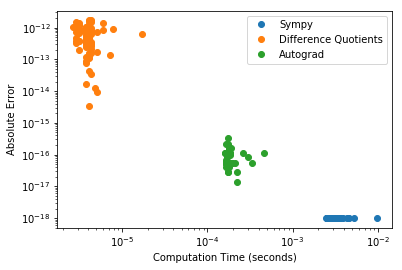

In [18]:
problem7(200)

The above figure shows the absolute error and the computation time for the three methods. It is similar to the figure in the problem 7. We could see that the Difference Quotient has the higest absolute error but has the fastest speed. The Sympy method has longest computation time, but it has the least error.